In [30]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display

import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

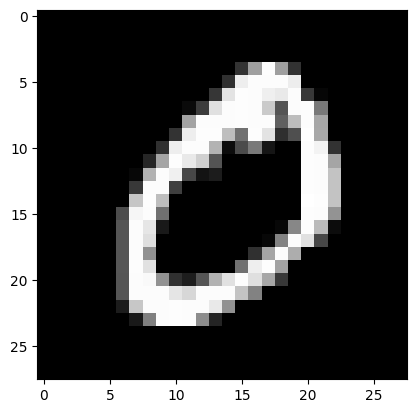

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[1], cmap = "gray")
plt.show()

In [32]:
LATENT_SIZE = 32


In [33]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])


In [34]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [17]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)


auto_encoder = Model(inputs = img, outputs = output)
auto_encoder.compile("nadam", loss = "binary_crossentropy")

***  EPOCHS  ***
Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1914
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1916
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1915
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1913
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1912
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1913
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1913
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1911
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1912
Epoch 10/10
1/1 [==============================] - 0s 20ms/step


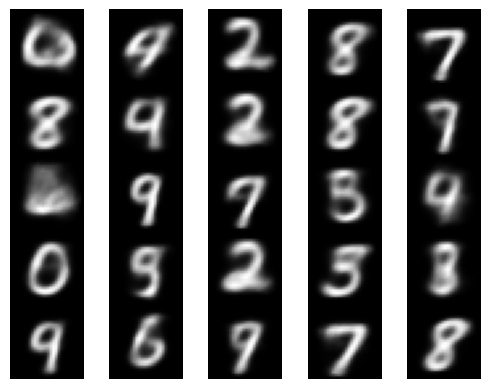

In [27]:
print("*** ", "EPOCHS "" ***")
auto_encoder.fit(x_train, x_train, epochs=10)
fig, axs = plt.subplots(5, 5)
rand = x_test[np.random.randint(0, 10000, 25)].reshape((5, 5, 1, 28, 28))

# display.clear_output() 

for i in range(5):
    for j in range(5):
        axs[i, j].imshow(auto_encoder.predict(rand[i, j])[0], cmap = "gray")
        axs[i, j].axis("off")

plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()
    